# Thasina Tabashum

1. Create a list with the names called image_files 

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

image_files = ['farm1.jpg', 'farm2.jpg', 'farm3.jpg', 'farm4.jpg',
          'farm5.jpg', 'farm6.jpg', 'farm7.jpg', 'farm8.jpg',
          'city1.jpg', 'city2.jpg', 'city3.jpg', 'city4.jpg',
          'city5.jpg', 'city6.jpg', 'city7.jpg', 'city8.jpg',
          'desert1.jpg', 'desert2.jpg', 'desert3.jpg', 'desert4.jpg',
          'desert5.jpg', 'desert6.jpg', 'desert7.jpg', 'desert8.jpg',
          'test1.jpg', 'test2.jpg', 'test3.jpg']


2. Now create an array of strings called training_target with the category of each.

In [10]:
training_target =['farm', 'farm', 'farm', 'farm',
 'farm', 'farm', 'farm', 'farm',
 'city', 'city', 'city', 'city',
 'city', 'city', 'city', 'city',
 'desert', 'desert', 'desert', 'desert',
 'desert', 'desert', 'desert', 'desert']


3. Create an empty array of zeros called training_data that will eventually store the percent green and percent blue values.

In [12]:
training_data = np.zeros((24, 2))
training_data

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

4. Now fill the training_data array with the proper values for each image, and observe the values in array after it is finished.

In [14]:
percent_green = []
percent_blue = []
for image_name in image_files:
    img = mpimg.imread("D:\\Courses\\BigData\\images2\\images2\\"+image_name)
    RGBtuple = np.array(img).mean(axis=(0,1))
    RGBsum = RGBtuple[0] + RGBtuple[1] + RGBtuple[2]
    percent_green.append(RGBtuple[1] / RGBsum)
    percent_blue.append(RGBtuple[2] / RGBsum)

In [15]:
farm_green = percent_green[0:8]
city_green = percent_green[8:16]
desert_green = percent_green[16:24]

farm_blue = percent_blue[0:8]
city_blue = percent_blue[8:16]
desert_blue = percent_blue[16:24]

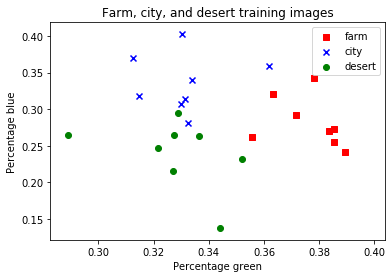

In [16]:
plt.scatter(farm_green, farm_blue, marker='s', c='red')
plt.scatter(city_green, city_blue, marker='x', c='blue')
plt.scatter(desert_green, desert_blue, marker='o', c='green')
# Show the boundary between the regions:
plt.title('Farm, city, and desert training images')
plt.xlabel('Percentage green')
plt.ylabel('Percentage blue')
plt.legend(['farm','city','desert'])
plt.show()

In [37]:
for i in range(0,24):
    training_data[i][0] = percent_green[i]
    training_data[i][1] = percent_blue[i]
training_data

array([[0.38537916, 0.27250258],
       [0.38947877, 0.2416675 ],
       [0.37176749, 0.2923693 ],
       [0.38534941, 0.25567274],
       [0.38368854, 0.26974449],
       [0.37822351, 0.34243724],
       [0.35577841, 0.26138973],
       [0.36318264, 0.32079251],
       [0.33384679, 0.33987008],
       [0.31457989, 0.31740955],
       [0.32982159, 0.30761097],
       [0.33021422, 0.40329483],
       [0.31267745, 0.37068047],
       [0.3620055 , 0.35922372],
       [0.33263931, 0.28122414],
       [0.33155648, 0.31387494],
       [0.28899154, 0.26478622],
       [0.32887465, 0.29461288],
       [0.32171351, 0.24749944],
       [0.35209261, 0.23171261],
       [0.32718513, 0.21564911],
       [0.33655681, 0.2638719 ],
       [0.34419192, 0.13749538],
       [0.32732039, 0.26438328]])

5. Create your classifier. 

In [70]:
from sklearn import neighbors

#k-NN classifier for k=1
#By using ‘distance’, closer neighbors will have greater weight #than further ones
k1 = neighbors.KNeighborsClassifier(n_neighbors=1, weights='distance')


6. Train your classifier. 


In [71]:
k1.fit(training_data,training_target )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

7. Now create an empty test_data array and fill it with the proper values for each test image,

In [72]:
test_data = np.zeros((3,2))
for i in range(24,27):
    test_data[i-25][0] = percent_green[i]
    test_data[i-25][1] = percent_blue[i]
test_data

array([[0.33429384, 0.17936789],
       [0.35004008, 0.24578861],
       [0.3269592 , 0.32688513]])

8. Predict the class of the test images. 

In [73]:
k1_pred = k1.predict(test_data)
print(k1_pred)

['desert' 'desert' 'city']


Print the prediction from the test images and compare with the actual images shown below. Make this comparison clear in the output of your code

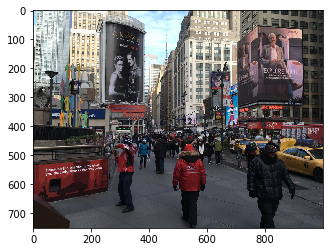

In [74]:
test1 = mpimg.imread('D:\\Courses\\BigData\\images2\\images2\\test1.jpg')
#Plots the image of a beach from the array data 
test1 = plt.imshow(test1)

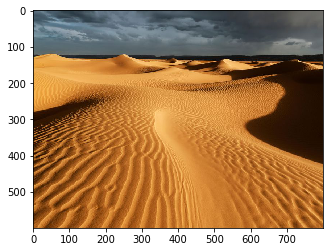

In [75]:
test2 = mpimg.imread('D:\\Courses\\BigData\\images2\\images2\\test2.jpg')
#Plots the image of a beach from the array data 
test2 = plt.imshow(test2)

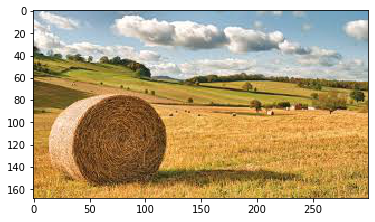

In [68]:
test3 = mpimg.imread('D:\\Courses\\BigData\\images2\\images2\\test3.jpg')
#Plots the image of a beach from the array data 
test3 = plt.imshow(test3)

In [76]:
from sklearn.metrics import accuracy_score, recall_score, average_precision_score, confusion_matrix, precision_score
test_target = ['city','desert','farm']
accuracy_k1 = accuracy_score(test_target,k1_pred)
print('Accuracy for k=1')
print(accuracy_k1*100)

Accuracy for k=1
33.33333333333333
